# **Import Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load Data
alz_data = pd.read_csv('/content/DATASET.csv')
print("Shape of ds:", alz_data.shape)
alz_data.head()

Shape of ds: (2149, 35)


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [ ]:
# The dataset contains a total of 2,149 observations.

# **Data Exploration**

In [3]:
alz_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [ ]:
# All values in the dataset are non-null and numerical.

# **Data Preprocessing**

In [4]:
# Check for missing Values
alz_data.isna().sum()
print("Missing values per column:\n", alz_data.isnull().sum())


Missing values per column:
 PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyC

In [ ]:
# There are no missing values, There are no duplicate records.

In [5]:
# Check data type
alz_data.dtypes


,0
PatientID,int64
Age,int64
Gender,int64
Ethnicity,int64
EducationLevel,int64
BMI,float64
Smoking,int64
AlcoholConsumption,float64
PhysicalActivity,float64
DietQuality,float64


In [6]:
# Drop uninformative columns
alz_clean = alz_data.drop(columns=['PatientID','DoctorInCharge'])
alz_clean

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,...,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,...,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,...,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,...,5.173891,0,0,3.785399,0,0,0,0,1,1


In [7]:
# Separate features and target
X = alz_clean.drop(columns=['Diagnosis']) # features
y = alz_clean['Diagnosis'] # target


In [8]:
print("Number of features after dropping ID columns:", X.shape[1])
print("Feature names:", X.columns.tolist())
print("Class distribution:\n", y.value_counts(normalize=True))

Number of features after dropping ID columns: 32
Feature names: ['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']
Class distribution:
 Diagnosis
0    0.646347
1    0.353653
Name: proportion, dtype: float64


# **Exploratory data analysis**

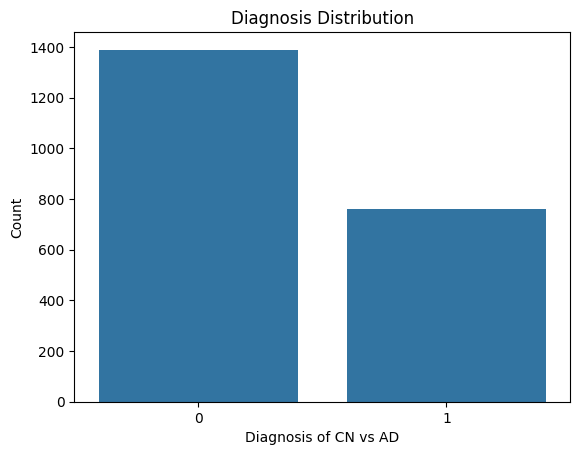

Diagnosis
0    1389
1     760
Name: count, dtype: int64


In [9]:
# Target distribution
sns.countplot(x='Diagnosis', data=alz_clean)
plt.title("Diagnosis Distribution")

plt.xlabel("Diagnosis of CN vs AD")
plt.ylabel("Count")
plt.show()

print(alz_clean['Diagnosis'].value_counts())

In [42]:
# Summary statistics
display(alz_clean.describe())


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


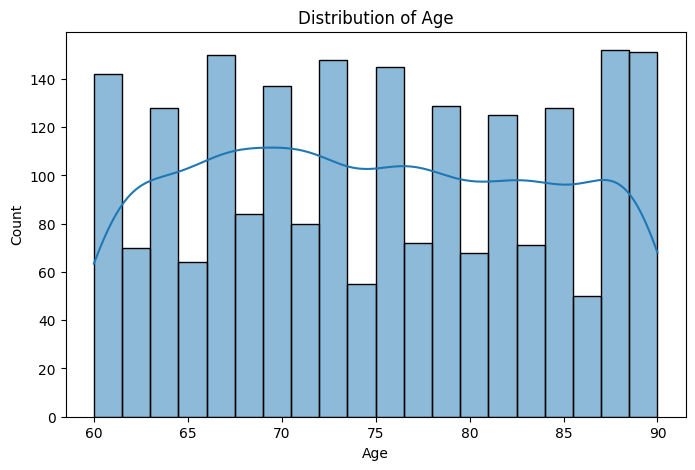

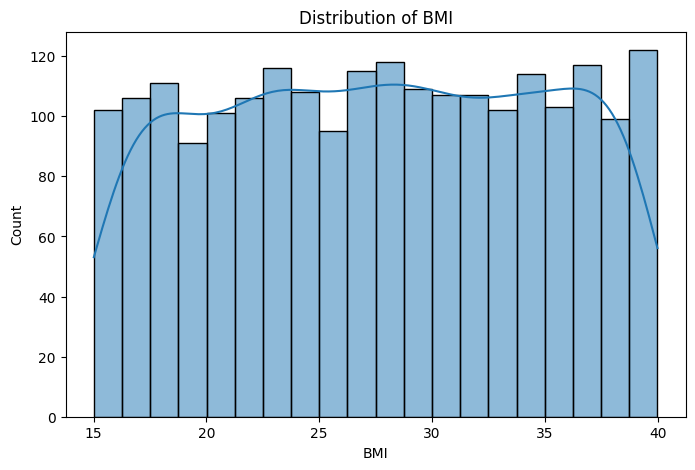

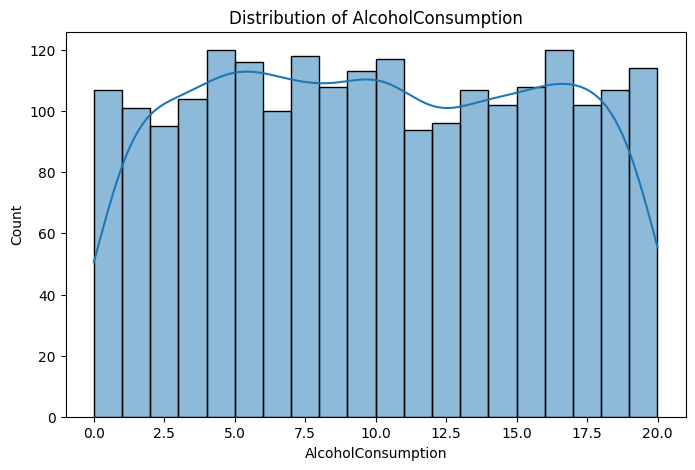

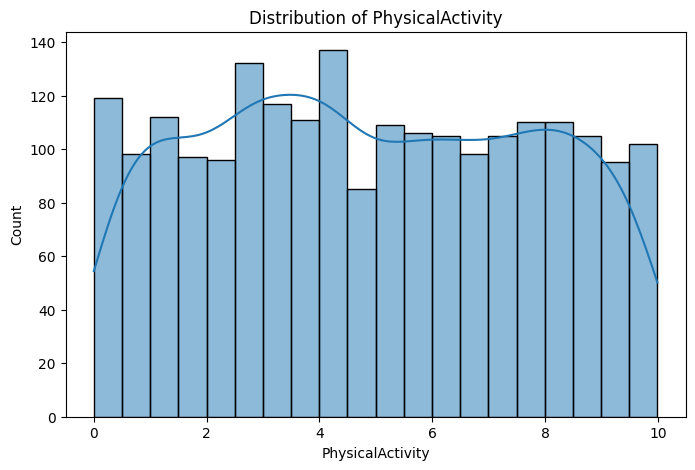

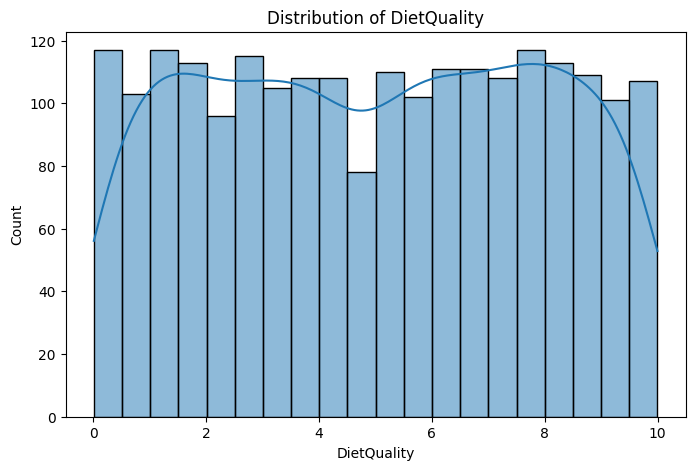

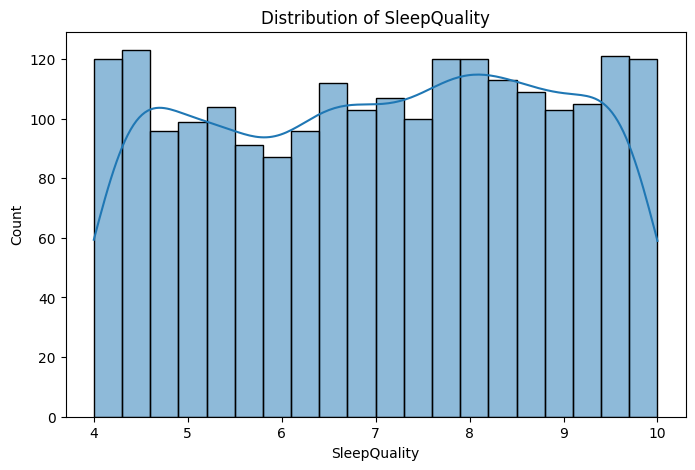

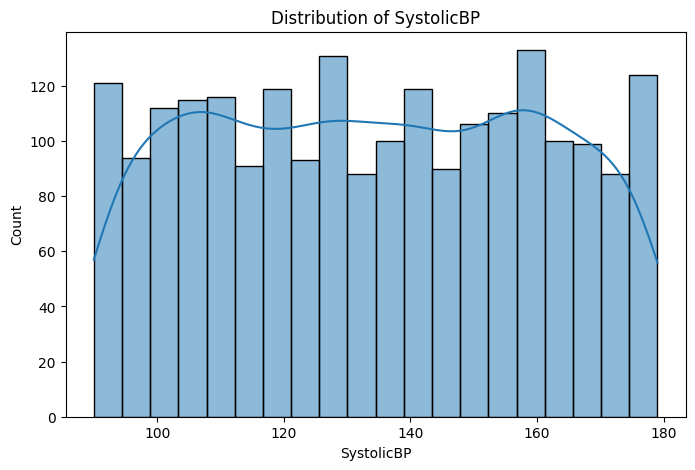

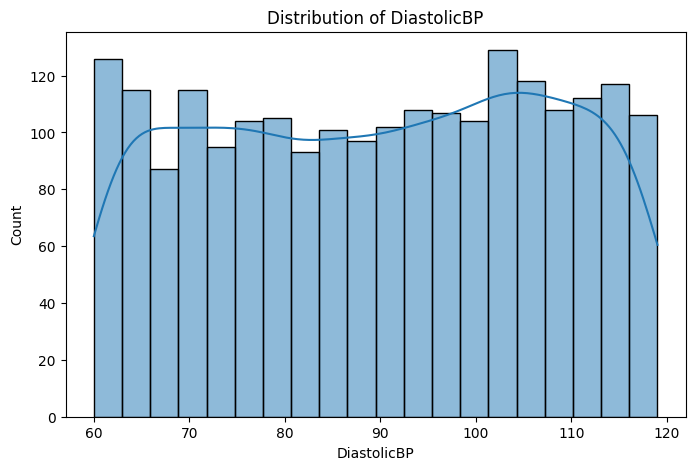

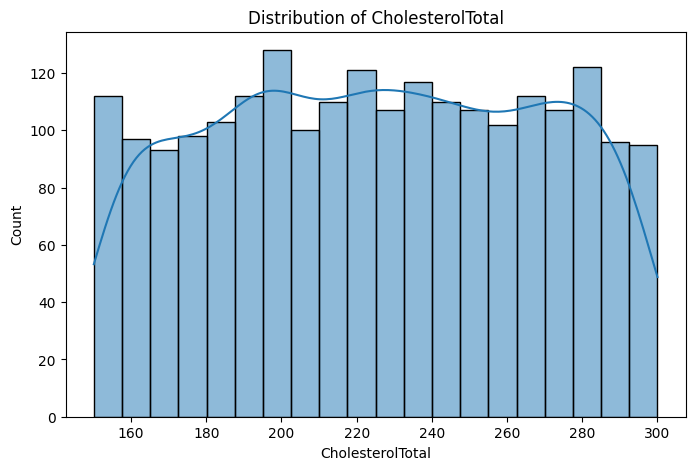

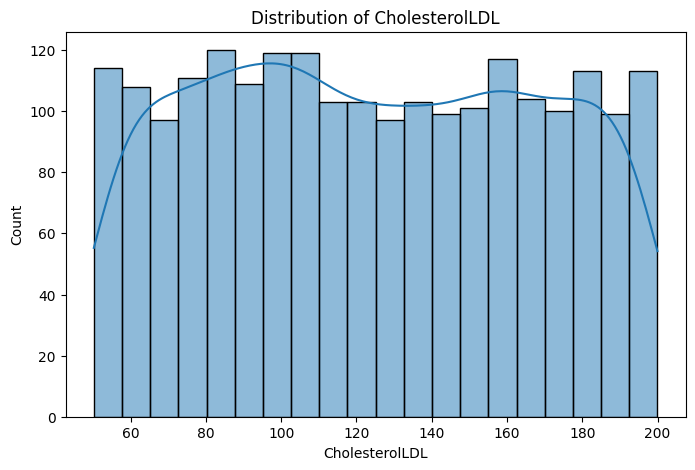

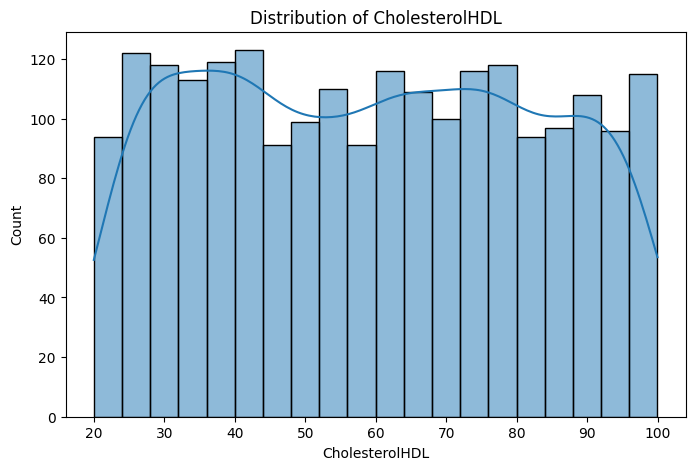

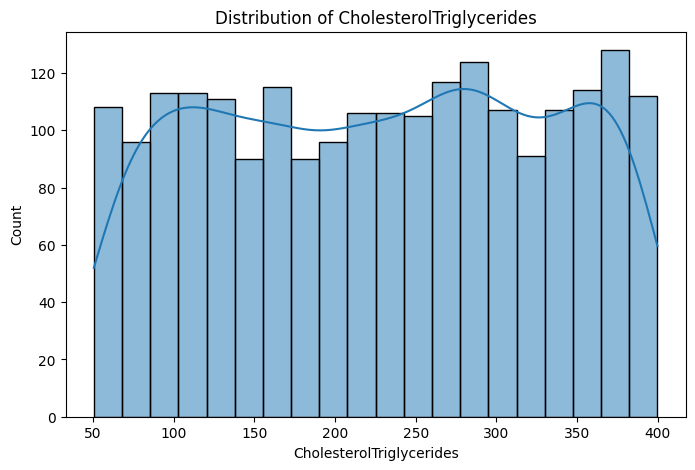

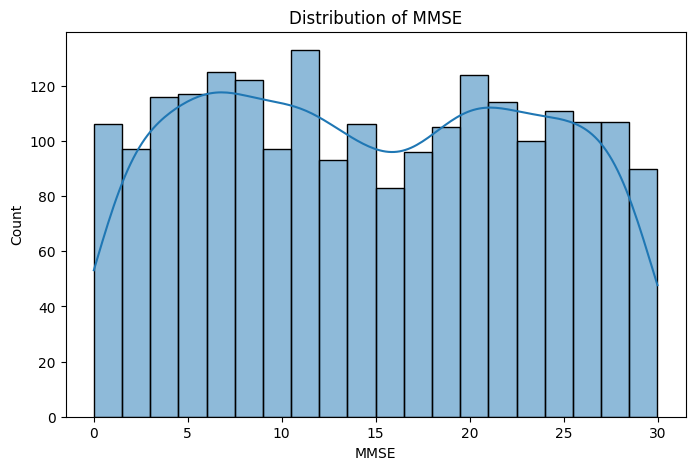

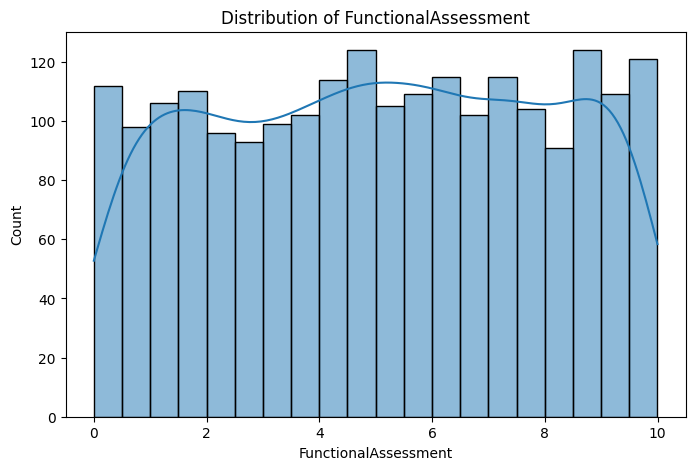

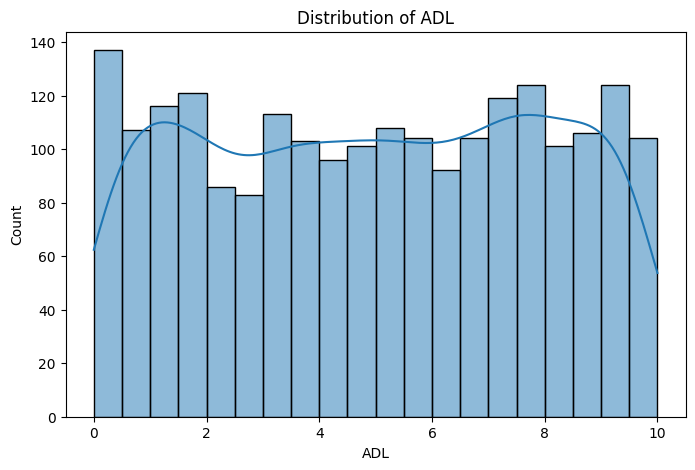

In [47]:
# Univariate Distribution of Key Continuous Variable

# Plot histogram for each numerical column
for column in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=alz_clean, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()


In [47]:
# Two features

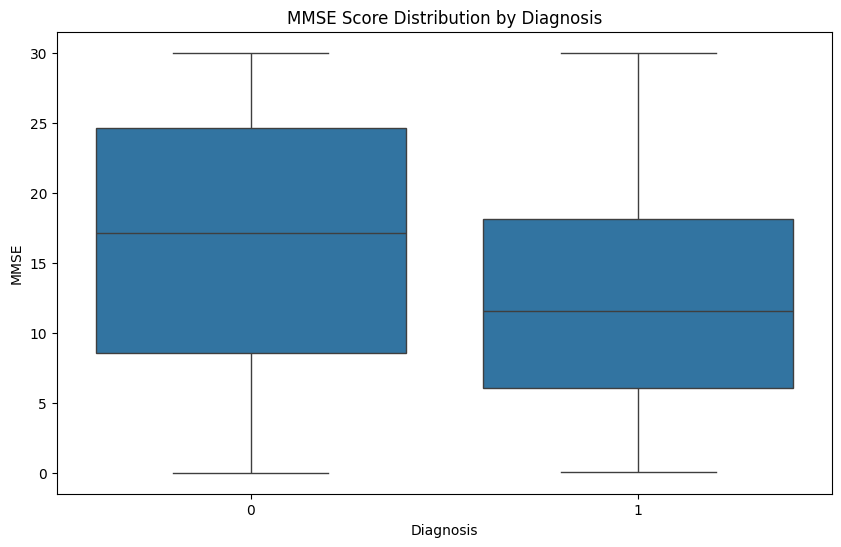

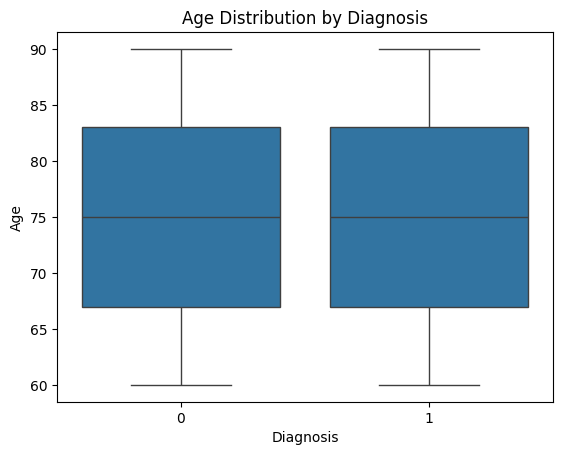

In [12]:
# MMSE
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diagnosis', y='MMSE', data=alz_data)
plt.title('MMSE Score Distribution by Diagnosis')
plt.show()

#  Age
sns.boxplot(x='Diagnosis', y='Age', data=alz_data)
plt.title('Age Distribution by Diagnosis')
plt.show()


In [13]:
# Random downsampling / under smampling
from sklearn.utils import resample
import numpy as np

# Concatenate X and y for sampling
df_balanced = pd.concat([X, y], axis=1)

# Downsample majority class
df_all = pd.concat([X, y], axis=1)
df_cn = df_all[df_all['Diagnosis'] == 0]
df_ad = df_all[df_all['Diagnosis'] == 1]

df_cn_down = resample(df_cn, replace=False, n_samples=len(df_ad), random_state=42)
df_balanced = pd.concat([df_cn_down, df_ad]).sample(frac=1, random_state=42).reset_index(drop=True)


# Separate back into X and y
X_balanced = df_balanced.drop(columns=['Diagnosis'])
y_balanced = df_balanced['Diagnosis']

# Print new shape and class balance
print("New class distribution:\n", y_balanced.value_counts())
X_balanced.shape, y_balanced.shape


New class distribution:
 Diagnosis
0    760
1    760
Name: count, dtype: int64


((1520, 32), (1520,))

In [14]:
# Categorical and numerical columns
categorical_cols = [
    'Gender', 'Ethnicity', 'EducationLevel', 'Smoking',
    'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
    'Depression', 'HeadInjury', 'Hypertension',
    'MemoryComplaints', 'BehavioralProblems',
    'Confusion', 'Disorientation', 'PersonalityChanges',
    'DifficultyCompletingTasks', 'Forgetfulness'
]

numerical_cols = [
    'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
    'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
    'MMSE', 'FunctionalAssessment', 'ADL'
]

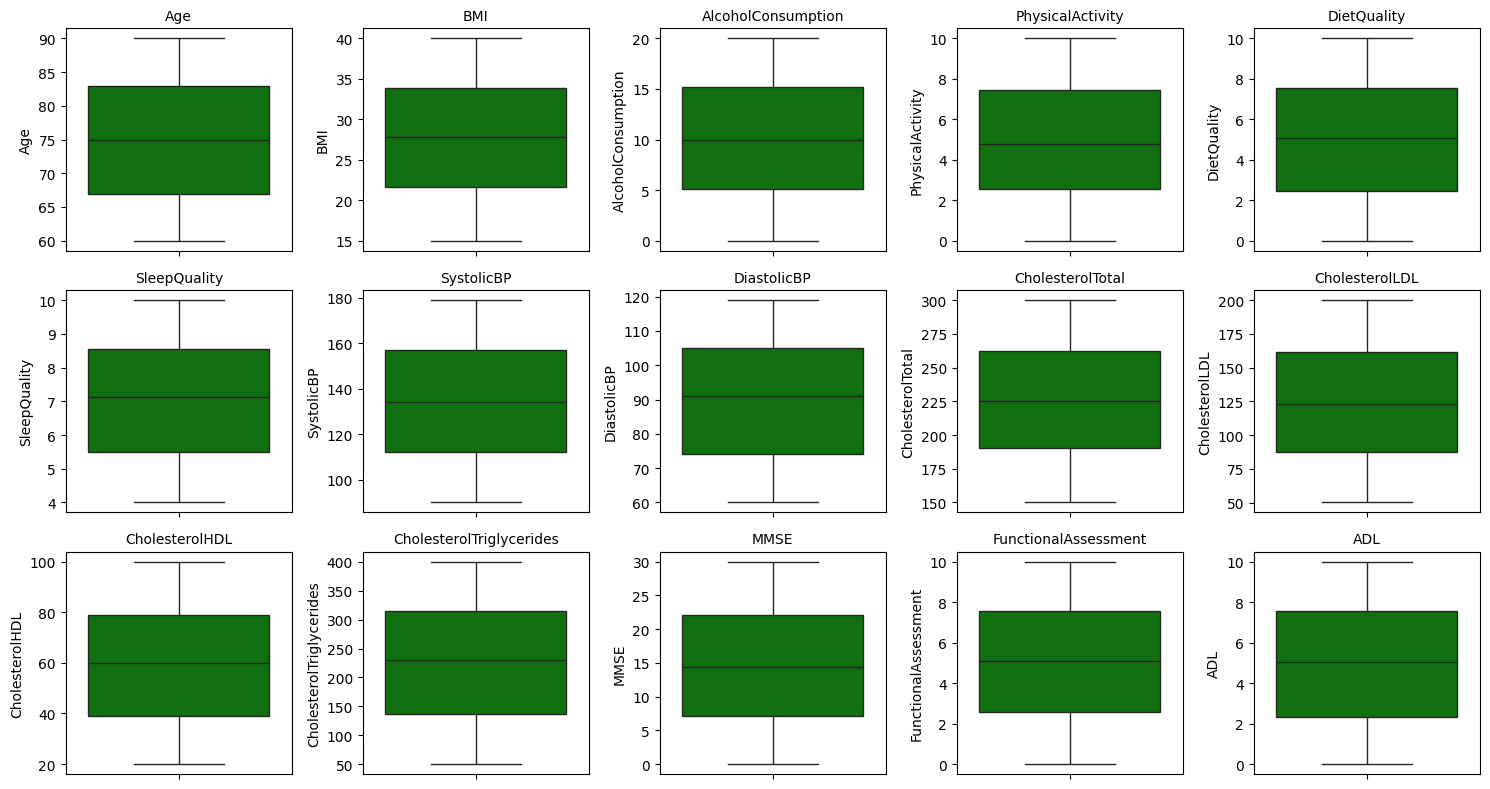

Age: 0 outliers
BMI: 0 outliers
AlcoholConsumption: 0 outliers
PhysicalActivity: 0 outliers
DietQuality: 0 outliers
SleepQuality: 0 outliers
SystolicBP: 0 outliers
DiastolicBP: 0 outliers
CholesterolTotal: 0 outliers
CholesterolLDL: 0 outliers
CholesterolHDL: 0 outliers
CholesterolTriglycerides: 0 outliers
MMSE: 0 outliers
FunctionalAssessment: 0 outliers
ADL: 0 outliers


In [15]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(y=alz_clean[col], color='green')
    plt.title(col, fontsize=10)
    plt.tight_layout()
plt.show()

# Detect Outliers
for col in numerical_cols:
    Q1 = alz_clean[col].quantile(0.25)
    Q3 = alz_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = alz_clean[(alz_clean[col] < Q1 - 1.5*IQR) | (alz_clean[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers")

# **Encoding Categorical Features and feature scaling**

In [16]:

# One-hot encode categorical columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X_balanced[categorical_cols])
encoded_cols = encoder.get_feature_names_out(categorical_cols)

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_balanced[numerical_cols])

# Combine final matrix
import numpy as np
X_final = np.concatenate([X_scaled, X_encoded], axis=1)
final_feature_names = numerical_cols + list(encoded_cols)



In [17]:
print(X_balanced.columns.tolist())
print("Final feature matrix shape:", X_final.shape)
print("Total features used:", len(final_feature_names))

['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']
Final feature matrix shape: (1520, 36)
Total features used: 36


In [62]:
import pandas as pd
from scipy.stats import pointbiserialr


X_raw = X_balanced.copy() #original df
y_raw = y_balanced

# Numerical stats
num_stats = []
for col in numerical_cols:
    mean_val = X_raw[col].mean()
    min_val = X_raw[col].min()
    max_val = X_raw[col].max()
    # Calculate correlation for the specific column with Diagnosis
    num_corr = alz_clean[[col, 'Diagnosis']].corr(numeric_only=True)['Diagnosis'][col]
    num_stats.append([col, f"{min_val:.2f} – {max_val:.2f}", f"{mean_val:.2f}", f"{num_corr:.3f}"])

num_df = pd.DataFrame(num_stats, columns=["Feature", "Range", "Mean Value", "Correlation"])


cat_stats = []
for col in categorical_cols:
    unique_vals = X_raw[col].unique()
    # Ensure the column is numeric for pointbiserialr; encode if categorical
    try:
        if X_raw[col].dtype.name in ['object', 'category', 'string']:
            # Encode categorical variable to numeric
            encoded_col = pd.factorize(X_raw[col])[0]
        else:
            encoded_col = X_raw[col]
        corr, _ = pointbiserialr(encoded_col, y_raw)
        cat_stats.append([col, f"{sorted(unique_vals)}", f"{corr:.3f}"])
    except Exception as e:
        print(f"Error processing {col}: {e}")
        cat_stats.append([col, f"{sorted(unique_vals)}", "N/A"])

cat_df = pd.DataFrame(cat_stats, columns=["Feature", "Categories", "Correlation"])

# Display
print("Numerical Features Table:")
display(num_df)
print("Categorical Features Table:")
display(cat_df)

Numerical Features Table:


,Feature,Range,Mean Value,Correlation
0,Age,60.00 – 90.00,74.78,-0.005
1,BMI,15.01 – 39.99,27.74,0.026
2,AlcoholConsumption,0.04 – 19.99,10.10,-0.008
3,PhysicalActivity,0.00 – 9.99,4.90,0.006
4,DietQuality,0.01 – 10.00,5.02,0.009
5,SleepQuality,4.00 – 10.00,6.98,-0.057
6,SystolicBP,90.00 – 179.00,134.20,-0.016
7,DiastolicBP,60.00 – 119.00,89.86,0.005
8,CholesterolTotal,150.09 – 299.96,225.76,0.006
9,CholesterolLDL,50.40 – 199.97,123.95,-0.032


Categorical Features Table:


,Feature,Categories,Correlation
0,Gender,"[np.int64(0), np.int64(1)]",-0.012
1,Ethnicity,"[np.int64(0), np.int64(1), np.int64(2), np.int...",-0.022
2,EducationLevel,"[np.int64(0), np.int64(1), np.int64(2), np.int...",-0.058
3,Smoking,"[np.int64(0), np.int64(1)]",-0.020
4,FamilyHistoryAlzheimers,"[np.int64(0), np.int64(1)]",-0.034
5,CardiovascularDisease,"[np.int64(0), np.int64(1)]",0.047
6,Diabetes,"[np.int64(0), np.int64(1)]",-0.039
7,Depression,"[np.int64(0), np.int64(1)]",-0.015
8,HeadInjury,"[np.int64(0), np.int64(1)]",-0.014
9,Hypertension,"[np.int64(0), np.int64(1)]",0.035


# **Traditional Feature Selection**

In [19]:
# Tradional feature selection
from sklearn.feature_selection import SelectKBest, f_classif

# Apply SelectKBest with ANOVA F-test
k = 10
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X_final, y_balanced)

# Get selected feature names
mask = selector.get_support()
selected_features = [feature for bool_val, feature in zip(mask, final_feature_names) if bool_val]

print(f"Top {k} selected features:")
print(selected_features)


Top 10 selected features:
['CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL', 'Ethnicity_1', 'Ethnicity_2', 'CardiovascularDisease_1', 'MemoryComplaints_1', 'BehavioralProblems_1']


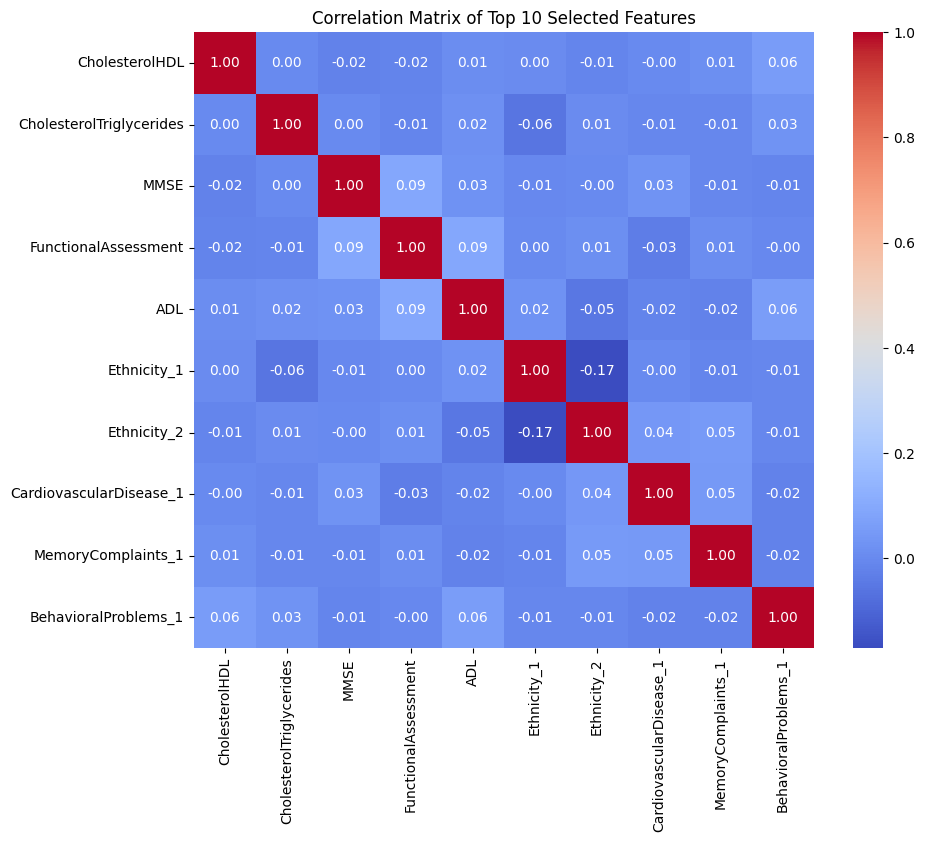

In [20]:

# Convert selected feature array back to DataFrame with names
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(X_selected_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Top 10 Selected Features")
plt.show()


# **ML Model Training and Evaluation**



In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score,f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced) # from top 10

# Building 4 ML classifiers
models = {
    "Logistic Regression": LogisticRegression(
        solver='liblinear', C=1.0, max_iter=1000, random_state=42
    ),
    "SVM (RBF Kernel)": SVC(
        C=1.0, kernel='rbf', gamma='scale', probability=True, random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=200, max_depth=None, min_samples_split=2, random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=300, max_depth=6, learning_rate=0.1,
        subsample=0.8, colsample_bytree=0.8,
        use_label_encoder=False, eval_metric='logloss', random_state=42
    )
}



In [22]:
# Train and evaluate
results = {}

# Making predictions
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    #Model Evaluation
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {"Accuracy": round(acc, 4), "ROC-AUC": round(auc, 4), "Precision": round(prec, 4), "Recall": round(rec, 4), "F1": round(f1, 4)}

# print results

results_df = pd.DataFrame(results).T.sort_values("Accuracy", ascending=False)
print(results_df)

                     Accuracy  ROC-AUC  Precision  Recall      F1
Random Forest          0.9342   0.9541     0.9286  0.9408  0.9346
XGBoost                0.9276   0.9512     0.9167  0.9408  0.9286
SVM (RBF Kernel)       0.8750   0.9348     0.8800  0.8684  0.8742
Logistic Regression    0.8355   0.9030     0.8110  0.8750  0.8418


In [23]:
# When Hyperparameter Tuning for Random Forest
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "max_features": ["sqrt", "log2"]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best ROC-AUC:", grid_search.best_score_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 300}
Best ROC-AUC: 0.9571037511021874


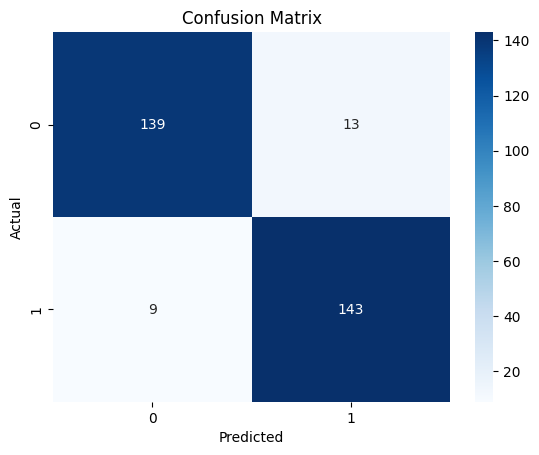

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Full-feature models (all 31) performed slightly better than SelectKBest-10  on those 10 only so its low

# **Explainable AI for Feature Selection**

In [25]:
# SHAP for global feature selection

# Combine numerical and encoded features correctly to get all feat df
X_df_all_features = pd.concat([
    pd.DataFrame(X_scaled, columns=numerical_cols).reset_index(drop=True),
    pd.DataFrame(X_encoded, columns=encoded_cols).reset_index(drop=True)
], axis=1)

print(" SHAP-ready DataFrame shape:", X_df_all_features.shape)


 SHAP-ready DataFrame shape: (1520, 36)


In [26]:
from sklearn.ensemble import RandomForestClassifier


In [69]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Split before training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_df_all_features, y_balanced, test_size=0.2, random_state=44, stratify=y_balanced
)
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    random_state=42
)
 # all 36
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [70]:
# Predictions
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]


Accuracy: 0.9276315789473685
ROC-AUC: 0.9468490304709141
Precision: 0.9166666666666666
Recall: 0.9407894736842105
F1: 0.9285714285714286


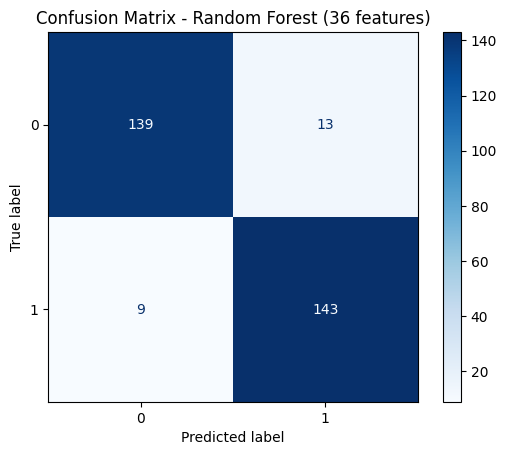

In [68]:
# Metrics
acc  = accuracy_score(y_test, y_pred)
auc  = roc_auc_score(y_test, y_proba)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("ROC-AUC:", auc)
print("Precision:", prec)
print("Recall:", rec)
print("F1:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest (36 features)")
plt.show()

## **SHAP for Interpretability**

100%|===================| 3038/3040 [02:08<00:00]       

SHAP values shape: (1520, 36, 2)


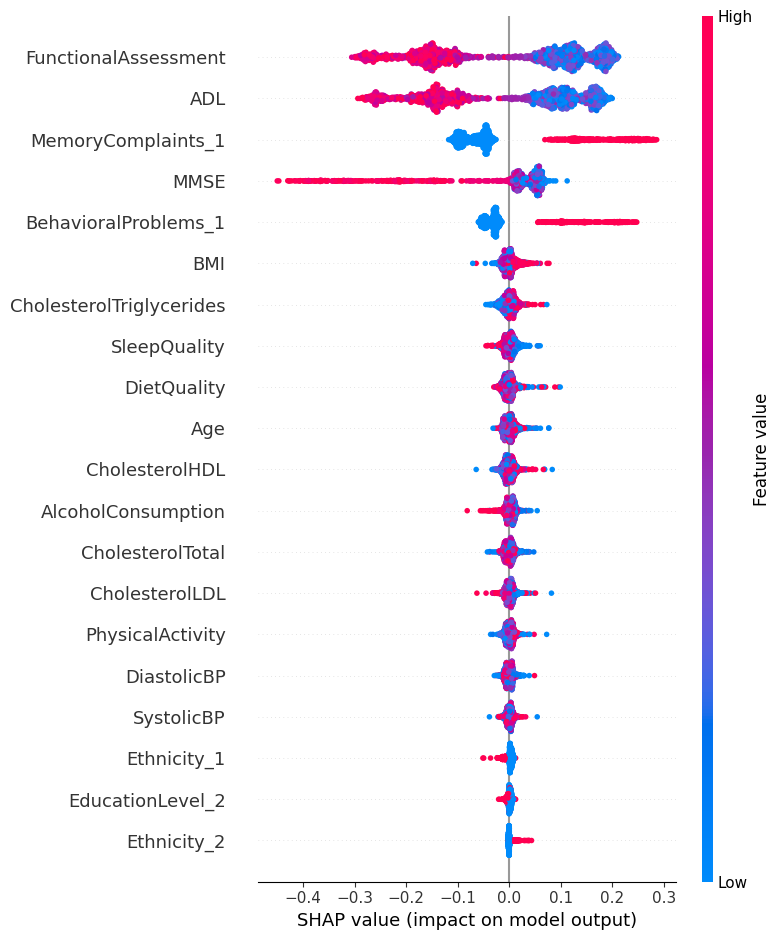

In [29]:
import shap
shap.initjs()

explainer = shap.Explainer(rf_model,X_df_all_features)
shap_values = explainer(X_df_all_features)
print("SHAP values shape:", shap_values.values.shape)

# Extract SHAP values for class 1
shap_class1 = shap_values.values[:, :, 1]  # shape: (1520, 36)

#Shap Importance Plot
shap.summary_plot(shap_class1, X_df_all_features, feature_names=X_df_all_features.columns)



In [30]:
# by elbow method

top_5_shap_features = [
    'FunctionalAssessment',
    'ADL',
    'MemoryComplaints_1',
    'MMSE',
    'BehavioralProblems_1'
]


In [31]:
X_shap_cv = X_df_all_features[top_5_shap_features]
y_cv = y_balanced

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define models
models = {
    "Logistic Regression": LogisticRegression(
        solver='liblinear', C=1.0, max_iter=1000, random_state=43
    ),
    "SVM (RBF Kernel)": SVC(
        C=1.0, kernel='rbf', gamma='scale', probability=True, random_state=46
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=200, max_depth=None, min_samples_split=2, random_state=47
    ),
    "XGBoost": XGBClassifier(
        n_estimators=300, max_depth=6, learning_rate=0.1,
        subsample=0.8, colsample_bytree=0.8,
        use_label_encoder=False, eval_metric='logloss', random_state=46
    )
}


In [33]:
# 5 fold stratified CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Collect results
cv_results = {}
for name, model in models.items():
    acc_scores = cross_val_score(model, X_shap_cv, y_cv, cv=skf, scoring='accuracy')
    auc_scores = cross_val_score(model, X_shap_cv, y_cv, cv=skf, scoring='roc_auc')

    cv_results[name] = {
        "CV Accuracy Mean": round(np.mean(acc_scores), 4),
        "CV Accuracy Std": round(np.std(acc_scores), 4),
        "CV ROC-AUC Mean": round(np.mean(auc_scores), 4),
        "CV ROC-AUC Std": round(np.std(auc_scores), 4)
    }

cv_df = pd.DataFrame.from_dict(cv_results, orient='index')
cv_df = cv_df.sort_values(by="CV Accuracy Mean", ascending=False)

# Print results
print("\n5-Fold Stratified CV Results on Top 5 SHAP Features:\n")
print(cv_df.to_string(index=True))


5-Fold Stratified CV Results on Top 5 SHAP Features:

                     CV Accuracy Mean  CV Accuracy Std  CV ROC-AUC Mean  CV ROC-AUC Std
Random Forest                  0.9414           0.0140           0.9501          0.0110
XGBoost                        0.9270           0.0155           0.9496          0.0090
SVM (RBF Kernel)               0.9072           0.0131           0.9471          0.0087
Logistic Regression            0.8270           0.0147           0.9070          0.0170


In [34]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=df358480a34e147fedfb1fa96a02ccd5c076e66a1a1fa1d48ffc490e48855ff1
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [35]:
import lime
import lime.lime_tabular
import numpy as np



# **Lime explanations**

In [36]:
# Top 5 SHAP features
top_5_shap_features = [
    'FunctionalAssessment', 'ADL', 'MemoryComplaints_1', 'MMSE', 'BehavioralProblems_1'
]

# Subset the data
X_lime = X_df_all_features[top_5_shap_features]
y_lime = y_balanced

# Train-test split again
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_lime, y_lime, test_size=0.2, stratify=y_lime, random_state=42
)

# Retrain the model on just these 5 features
from sklearn.ensemble import RandomForestClassifier

rf_lime = RandomForestClassifier(n_estimators=100, random_state=42)
rf_lime.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [37]:
#These values are low scores, indicating poor daily living, cognitive function, and memory state — all clinical markers of Alzheimer’s.LIME shows that these 3 features positively push the prediction toward AD, While memory complaints and behavioral symptoms were also present, they alone would have leaned toward CN, but the severity of functional markers outweighed them.

In [38]:
# Time comparison metrics
full_36_features = final_feature_names

trad_10_features = selected_features  # from  ANOVA phase
shap_5_features = top_5_shap_features         # from  SHAP phase


## **Comparitive Analysis**

In [64]:

import time
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

# Map feature names to column indices once
feature_name_to_index = {name: idx for idx, name in enumerate(final_feature_names)}

def get_feature_indices(feature_names):
    return [feature_name_to_index[name] for name in feature_names]

scenarios = {
    "Full_36": get_feature_indices(full_36_features),
    "Trad_10": get_feature_indices(trad_10_features),
    "SHAP_5": get_feature_indices(shap_5_features),
}

def evaluate_scenario(X_all, y_all, feature_indices, n_splits=5, seed=42):
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)

    accuracies = []
    auc_scores = []
    f1_scores = []
    precisions = []
    recalls = []
    prediction_times = []

    for train_indices, test_indices in kfold.split(X_all, y_all):
        X_train, X_test = X_all[train_indices][:, feature_indices], X_all[test_indices][:, feature_indices]
        y_train, y_test = y_all[train_indices], y_all[test_indices]

        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        start_time = time.perf_counter()
        y_probabilities = model.predict_proba(X_test)
        end_time = time.perf_counter()

        y_predictions = (y_probabilities[:, 1] >= 0.5).astype(int)

        accuracies.append(accuracy_score(y_test, y_predictions))
        auc_scores.append(roc_auc_score(y_test, y_probabilities[:, 1]))
        f1_scores.append(f1_score(y_test, y_predictions, pos_label=1))
        precisions.append(precision_score(y_test, y_predictions, pos_label=1, zero_division=0))
        recalls.append(recall_score(y_test, y_predictions, pos_label=1))

        avg_time_per_instance = (end_time - start_time) / len(X_test)
        prediction_times.append(avg_time_per_instance)

    return {
        "Accuracy": float(np.mean(accuracies)),
        "ROC_AUC": float(np.mean(auc_scores)),
        "F1": float(np.mean(f1_scores)),
        "Precision": float(np.mean(precisions)),
        "Recall": float(np.mean(recalls)),
        "Prediction Time ": float(np.mean(prediction_times)),
    }


In [63]:
results = []
for scenario_name, feature_indices in scenarios.items():
    scenario_results = evaluate_scenario(X_final, y_balanced, feature_indices)
    results.append({
        "Scenario": scenario_name,
        "Features": len(feature_indices),
        **scenario_results
    })

results_df = pd.DataFrame(results).sort_values("ROC_AUC", ascending=False).reset_index(drop=True)
results_df


,Scenario,Features,Accuracy,ROC_AUC,F1,Precision,Recall,Prediction Time
0,Full_36,36,0.930921,0.950809,0.929540,0.949503,0.910526,0.000087
1,Trad_10,10,0.943421,0.950558,0.942204,0.962945,0.922368,0.000047
2,SHAP_5,5,0.942105,0.949866,0.941130,0.957909,0.925000,0.000038


In [66]:
import lime
import lime.lime_tabular

#Create the Explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=top_5_shap_features,
    class_names=['CN', 'AD'],
    mode='classification'
)

# Choosing the 7th instance to predict the results
i = 7
lime_exp = lime_explainer.explain_instance(
    data_row=X_test.iloc[i].values,
    predict_fn=rf_lime.predict_proba
)

lime_exp.show_in_notebook()
